In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import pickle
import pandas as pd
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
import matplotlib.pyplot as plt
from ml_utilities.torch_models.fc import FC
from erank.utils import load_model_from_idx, load_directions_matrix_from_task_sweep, load_multiple_dir_matrices_from_sweep
from erank.plot import plot_models_erank
from erank.analyses import create_model_erank_df
from erank.output_loader.job_output import SweepResult
from erank.output_loader.plot import plot_sweep_summary
gpu_id = 0

## Erank plots

### Create model dict

In [2]:
sweep_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--221022_171401'
sweep_output_path = Path(sweep_dir) / 'outputs'
num_vectors = -1

In [3]:
# check for missing best_epoch_files
# sweep_output_path = sweep_conv4
for p in sweep_output_path.iterdir():
    bepf = p / 'best_step.txt'
    if not bepf.exists():
        print(str(p))

In [4]:
pretrain_variations = {
    'pretrain_steps_0': '*init_model_step-0-*',
    'pretrain_steps_5': '*init_model_step-5-*',
    'pretrain_steps_10': '*init_model_step-10-*',
    'pretrain_steps_15': '*init_model_step-15-*',
    'pretrain_steps_20': '*init_model_step-20-*',
    'pretrain_steps_50': '*init_model_step-50-*',
    'pretrain_steps_100': '*init_model_step-100-*',
    'pretrain_steps_480': '*init_model_step-480-*',
}

In [5]:
# load a model
run = next(iter(sweep_output_path.iterdir()))
init_model = load_model_from_idx(run, idx=0, device='cpu')

In [9]:
# load model matrices
# model_dict = load_multiple_dir_matrices_from_sweep(path_to_runs=sweep_output_path,
#                                                    name_run_glob_pattern_dict=pretrain_variations,
#                                                    num_runs=num_vectors,
#                                                    device='cpu')
# with open(Path('./../tmp/rotated_fmnist_erank_plots/') / f'model_dict_rotated_tasks_conv4_num_vecs{num_vectors}.p', 'wb') as savefile:
#     pickle.dump(model_dict, savefile, protocol=pickle.HIGHEST_PROTOCOL)

Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--221022_171401/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-99.77715877437325-seed-0--221024_080102: 100%|██████████| 360/360 [00:53<00:00,  6.79it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--221022_171401/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-5-rotation_angle-99.77715877437325-seed-0--221023_033241: 100%|██████████| 360/360 [00:51<00:00,  6.96it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--221022_171401/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-10-rotation_angle-99.77715877437325-seed-0--221023_114359: 100%|██████████| 360/360 [00:50<00:00,  7.06it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/fmnist-11.8.1_ft-conv4_rotatedtasks--221022_171401/o

### Load model dict

In [6]:
model_dict_path = f'./../tmp/rotated_fmnist_erank_plots/model_dict_rotated_tasks_conv4_num_vecs{num_vectors}.p'
model_dict_path = Path(model_dict_path)
# init_model_path = './../tmp/erank_plots/init_model.p'
# init_model_path = Path(init_model_path)

In [7]:
# load init model
# init_model = FC.load(init_model_path, device=gpu_id)
# init_model, init_model.device

In [8]:
# unpickle model dict
with open(model_dict_path, 'rb') as loadfile:
    model_dict = pickle.load(loadfile)

In [9]:
list(model_dict.keys()), type(model_dict)

(['pretrain_steps_0#*init_model_step-0-*',
  'pretrain_steps_5#*init_model_step-5-*',
  'pretrain_steps_10#*init_model_step-10-*',
  'pretrain_steps_15#*init_model_step-15-*',
  'pretrain_steps_20#*init_model_step-20-*',
  'pretrain_steps_50#*init_model_step-50-*',
  'pretrain_steps_100#*init_model_step-100-*',
  'pretrain_steps_480#*init_model_step-480-*'],
 dict)

### Generate erank plot

In [10]:
erank_df = create_model_erank_df(models=model_dict, random_init_model=init_model, device=gpu_id)

Calculate eranks: 100%|██████████| 37/37 [00:11<00:00,  3.12it/s]


In [40]:
# erank_df.to_pickle('./erank_df.p')

In [41]:
# erank_df = pd.read_pickle('./../tmp/erank_plots/erank_df.p')

In [42]:
# column_name_to_plot_kwargs = {'almost_point#*ampl-1.0_1.1-ph-0_0.1*': {'label': 'Very narrow', 'color':'#ffa600'},
#                               'narrow#*ampl-0.1_2.5-ph-0_1.5*': {'label': 'Narrow', 'color':'#ff6e54'}, 
#                               'normal#*ampl-0.1_5.0-ph-0_3.141592654*': {'label': 'Regular', 'color':'#dd5182'}, 
#                               'wide#*ampl-0.1_10.0-ph-0_3.141592654*': {'label': 'Wide', 'color':'#955196'}, 
#                               'Random model initializations': {'label': 'Random model initializations', 'color':'#444e86'}, 
#                               'Gaussian random': {'label': 'Gaussian random vectors', 'color':'#003f5c'}, 
#                               }

In [11]:
column_name_to_plot_kwargs = {}

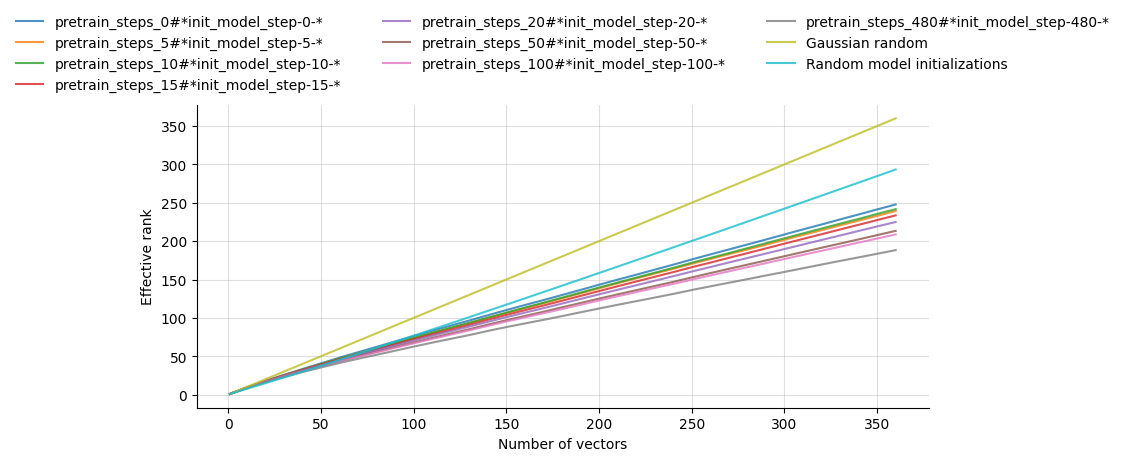

In [12]:
fig, ax = plot_models_erank(erank_df=erank_df, column_name_to_plot_kwargs=column_name_to_plot_kwargs, legend_columns=3, columnspacing=3.0)

In [45]:
# fig.savefig(f'11_6_mnist_lenet_rotatedtasks_erankplot.pdf', bbox_inches='tight')

In [46]:
# fig.savefig(f'11_6_mnist_conv4_rotatedtasks_erankplot.png', dpi=300, bbox_inches='tight')

## Details about runs

In [40]:
sweepr = SweepResult(sweep_dir)
sweepr.sweep_params

['trainer.init_model_step', 'data.dataset_kwargs.rotation_angle']

In [15]:
sweepr.get_failed_jobs()

100%|██████████| 2880/2880 [00:04<00:00, 674.69it/s]


[]

In [16]:
js = sweepr.get_jobs()
len(js)

2880

In [18]:
js[0].override_hpparams

{'trainer.init_model_step': 0,
 'data.dataset_kwargs.rotation_angle': 116.32311977715877}

In [19]:
js[0].data_log_sources

['train_step', 'train', 'val']

In [20]:
js[0].get_data_log(source='val')

,epoch,train_step,loss_CrossEntropyLoss,Accuracy,time_last_val_epoch_in_s,log_step
0,0,0,2.301867,0.099500,0.000000,0
1,1,5,2.152523,0.546833,10.444881,6
2,1,10,1.516099,0.572917,2.908561,12
3,1,15,0.985726,0.642417,3.041914,18
4,1,20,0.859797,0.689000,2.893720,24
...,...,...,...,...,...,...
396,6,1980,0.250103,0.906583,2.960239,2381
397,6,1985,0.260087,0.901750,2.665326,2387
398,6,1990,0.287166,0.891583,2.991433,2393
399,6,1995,0.276092,0.897667,3.087034,2399


In [38]:
js[0].get_summary(log_source='val', col_sel=['Accuracy'])

,best_step,best_val_score,Accuracy-train_step-1850,trainer.init_model_step,data.dataset_kwargs.rotation_angle,seed
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-116.32311977715877-seed-0--221023_212746,1850,0.90775,0.90775,0,116.32312,0


In [30]:
js[0].get_summary(log_source='val', row_sel=('train_step', 5), col_sel=['Accuracy'])

,best_step,best_val_score,Accuracy-train_step-5,trainer.init_model_step,data.dataset_kwargs.rotation_angle,seed
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-116.32311977715877-seed-0--221023_212746,1850,0.90775,0.546833,0,116.32312,0


In [23]:
sdf = sweepr.get_summary(log_source='val', row_sel=('train_step', 0), col_sel=['Accuracy'])
sdf

100%|██████████| 2880/2880 [02:03<00:00, 23.27it/s]


,best_step,best_val_score,Accuracy-train_step-0,trainer.init_model_step,data.dataset_kwargs.rotation_angle,seed
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-0.0-seed-0--221023_191424,1835,0.906000,0.094917,0,0.000000,0
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-0.5013927576601671-seed-0--221023_055203,1850,0.905000,0.095500,0,0.501393,0
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-1.0027855153203342-seed-0--221024_144734,1980,0.906333,0.096417,0,1.002786,0
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-1.5041782729805013-seed-0--221023_092936,1810,0.904333,0.096833,0,1.504178,0
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-0-rotation_angle-10.027855153203342-seed-0--221023_070419,1805,0.906833,0.099583,0,10.027855,0
...,...,...,...,...,...,...
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-50-rotation_angle-97.77158774373258-seed-0--221023_212117,1400,0.905917,0.021000,50,97.771588,0
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-50-rotation_angle-98.27298050139275-seed-0--221022_201227,1850,0.907250,0.021250,50,98.272981,0
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-50-rotation_angle-98.77437325905292-seed-0--221024_134817,1400,0.907333,0.021500,50,98.774373,0
fmnist-11.8.1_ft-conv4_rotatedtasks--init_model_step-50-rotation_angle-99.27576601671309-seed-0--221023_105742,1845,0.908000,0.021167,50,99.275766,0


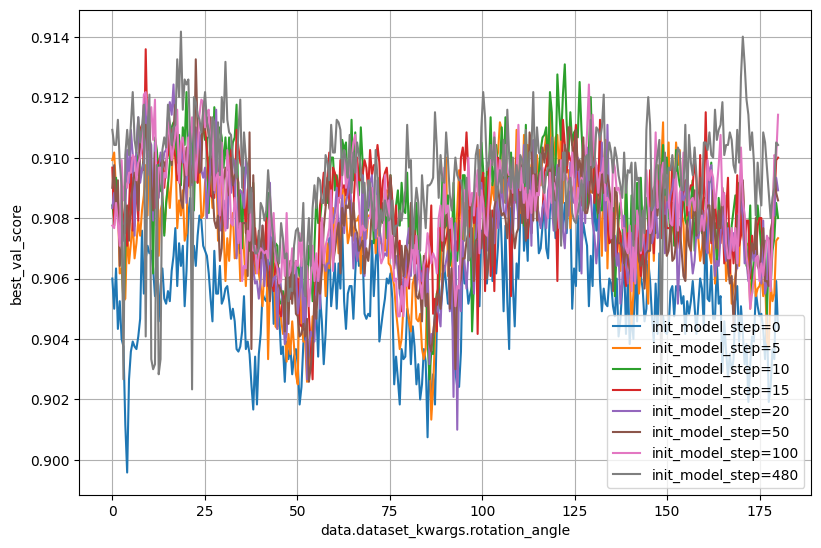

In [24]:
f = plot_sweep_summary(sdf, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_val_score', compare_parameter='trainer.init_model_step')

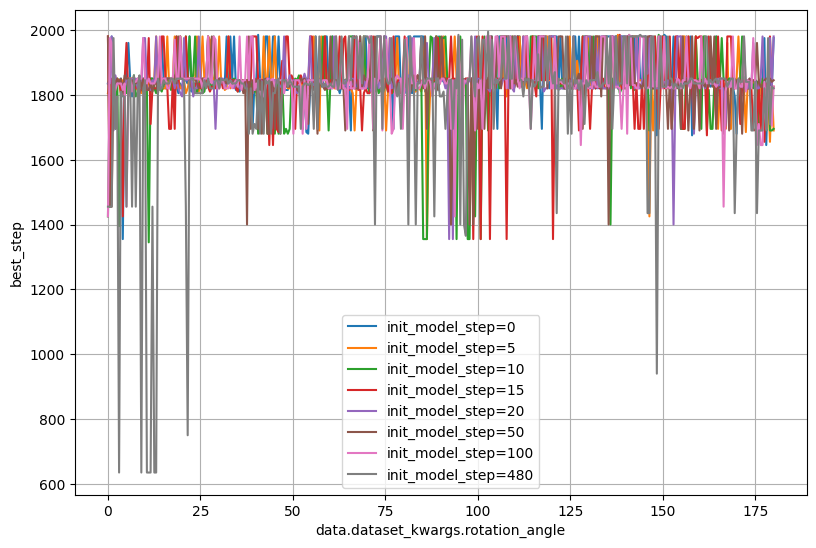

In [25]:
f = plot_sweep_summary(sdf, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_step', compare_parameter='trainer.init_model_step')

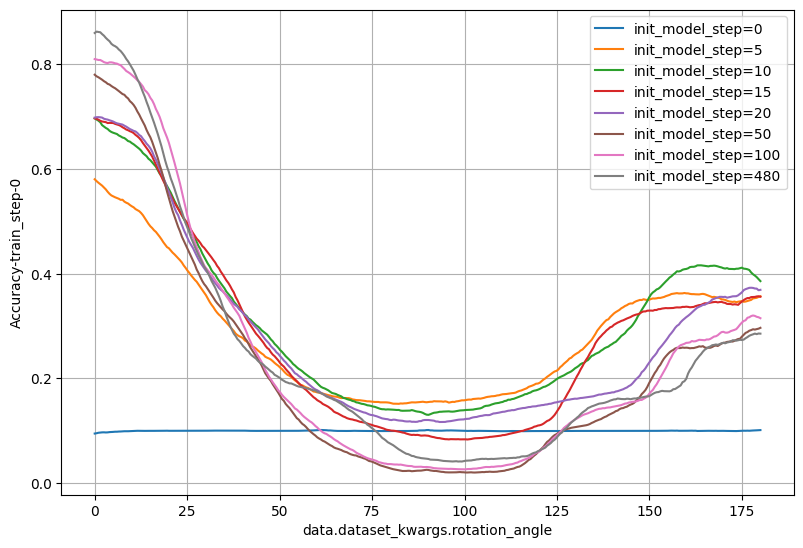

In [26]:
f = plot_sweep_summary(sdf, x_axis='data.dataset_kwargs.rotation_angle', y_axis='Accuracy-train_step-0', compare_parameter='trainer.init_model_step')

100%|██████████| 2880/2880 [05:36<00:00,  8.55it/s]


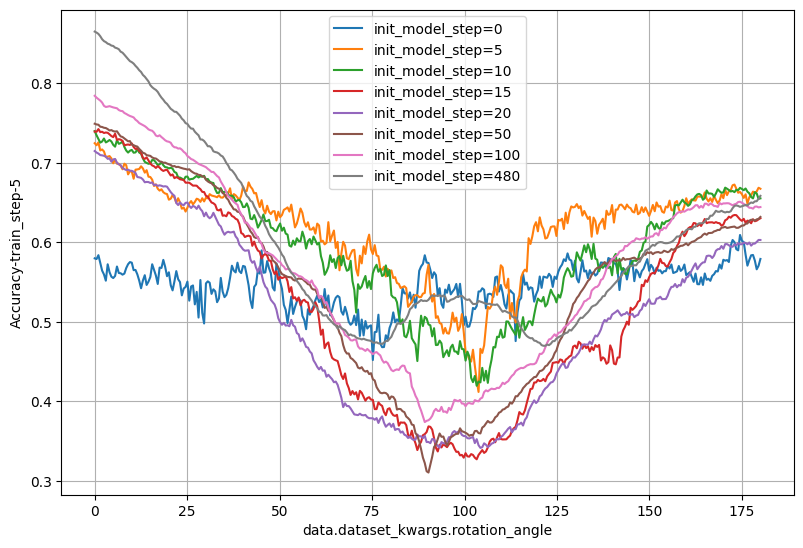

In [31]:
train_step = 5
sdf2 = sweepr.get_summary(log_source='val', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf2, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 2880/2880 [05:36<00:00,  8.55it/s]


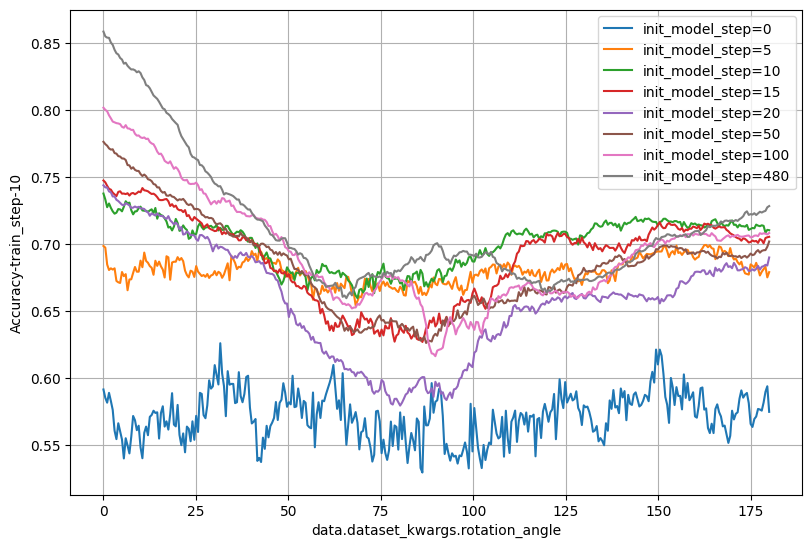

In [32]:
train_step = 10
sdf2 = sweepr.get_summary(log_source='val', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf2, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 2880/2880 [05:37<00:00,  8.52it/s]


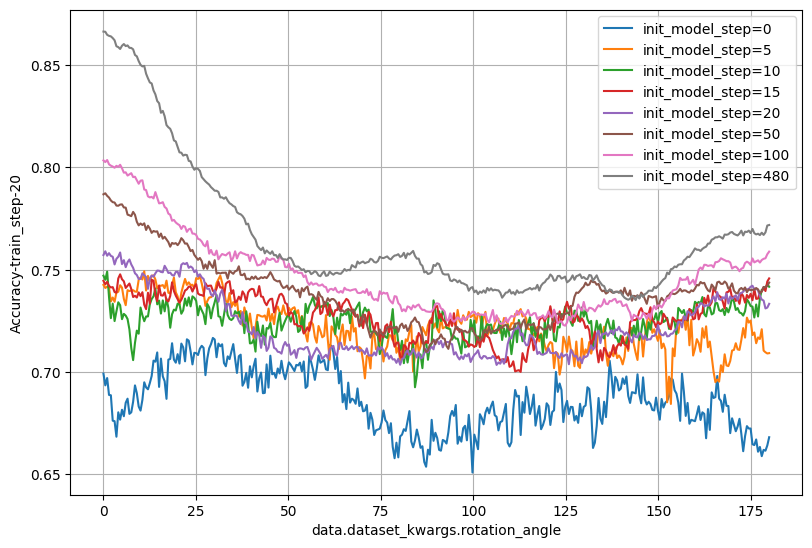

In [33]:
train_step = 20
sdf3 = sweepr.get_summary(log_source='val', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 2880/2880 [05:40<00:00,  8.46it/s]


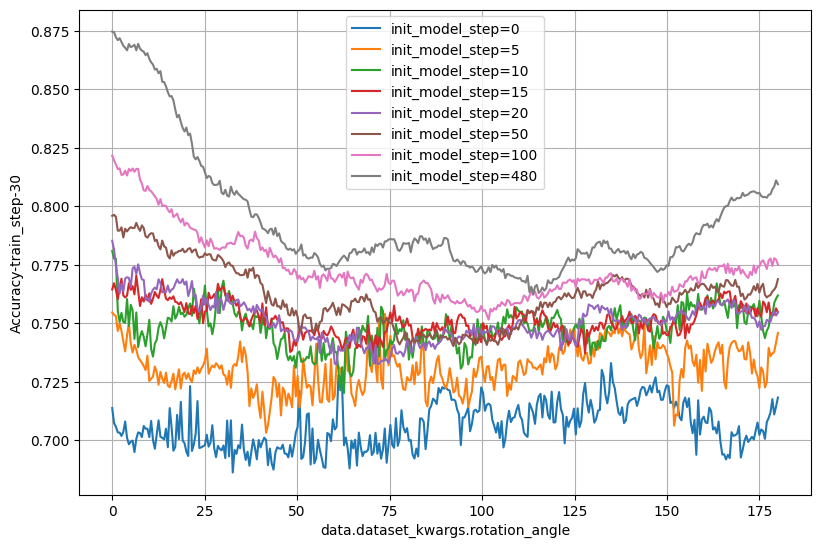

In [34]:
train_step = 30
sdf3 = sweepr.get_summary(log_source='val', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 2880/2880 [05:37<00:00,  8.52it/s]


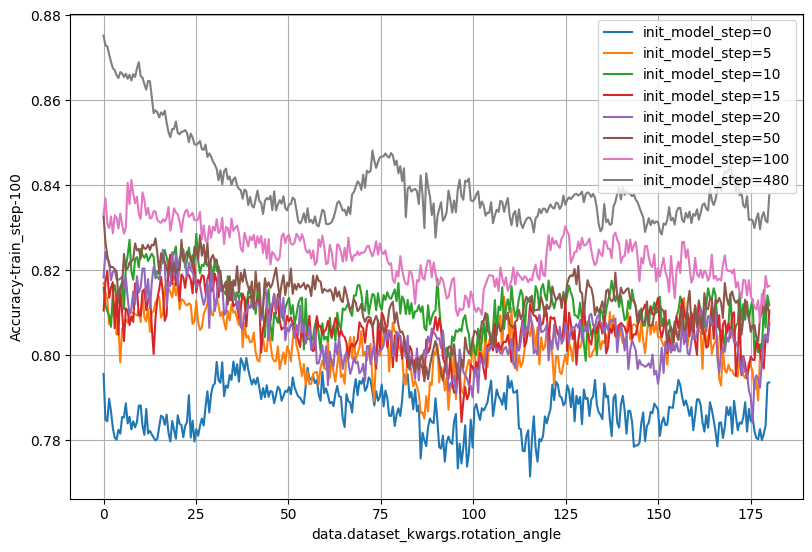

In [42]:
train_step = 100
sdf3 = sweepr.get_summary(log_source='val', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

In [43]:
train_step = 500
sdf3 = sweepr.get_summary(log_source='val', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

  4%|▍         | 120/2880 [00:13<05:17,  8.70it/s]